In [2]:
import pandas as pd
import numpy as np
import seaborn as sns








In [3]:
newcustomer=pd.read_csv("E:/KPMG Project/NewCustomerlist.csv")
newcustomer.head()
oldcustomer=pd.read_csv("E:/KPMG Project/merged_data.csv")
oldcustomer.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'index', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date'],
      dtype='object')

In [5]:
oldcustomer['gender'].replace("Femal", "Female", inplace=True)

In [6]:
newcustomer.drop(newcustomer.columns[newcustomer.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
newcustomer

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6.0,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11.0,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5.0,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1.0,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9.0,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7.0,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10.0,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2.0,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2.0,997,0.357000


In [9]:
ct1=pd.crosstab(oldcustomer["wealth_segment"], oldcustomer["product_line"])
ct1

product_line,Mountain,Road,Standard,Touring
wealth_segment,,,,
Affluent Customer,56,592,2206,186
High Net Worth,63,614,2243,186
Mass Customer,130,1253,4359,358


In [10]:
age_groups=pd.cut(oldcustomer['Age'], bins=[20,30,40,50,60,70,80,90,100])
age_groups

0        (60, 70]
1        (60, 70]
2        (60, 70]
3        (60, 70]
4        (60, 70]
           ...   
12241    (30, 40]
12242    (30, 40]
12243    (30, 40]
12244    (30, 40]
12245    (30, 40]
Name: Age, Length: 12246, dtype: category
Categories (8, interval[int64, right]): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90] < (90, 100]]

In [11]:
ct=pd.crosstab(age_groups, oldcustomer['product_line'])
ct

product_line,Mountain,Road,Standard,Touring
Age,,,,
"(20, 30]",41,363,1326,95
"(30, 40]",46,463,1482,143
"(40, 50]",93,862,3080,239
"(50, 60]",33,424,1599,150
"(60, 70]",34,343,1302,103
"(70, 80]",1,2,8,0
"(80, 90]",0,0,5,0
"(90, 100]",1,2,6,0


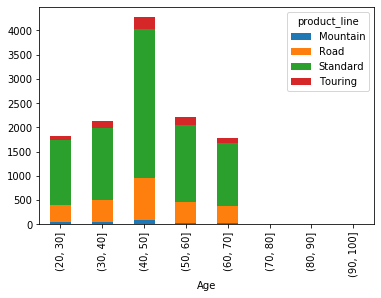

In [12]:
ct.plot(kind="bar", stacked=True)

In [13]:
ct1=pd.crosstab(oldcustomer["wealth_segment"], oldcustomer["product_line"])
ct1

product_line,Mountain,Road,Standard,Touring
wealth_segment,,,,
Affluent Customer,56,592,2206,186
High Net Worth,63,614,2243,186
Mass Customer,130,1253,4359,358


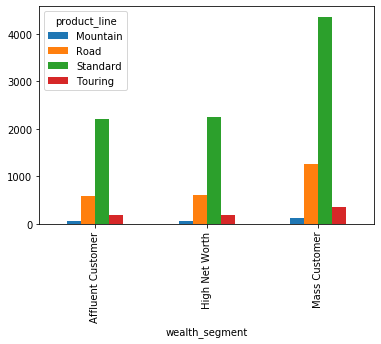

In [14]:
ct1.plot(kind="bar", stacked=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A614D2C438>,
      dtype=object)

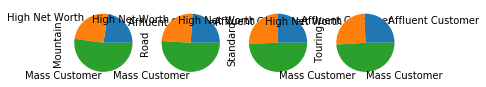

In [15]:
ct1.plot(kind="pie", subplots=True, legend=False)

In [16]:
ct2=pd.crosstab(oldcustomer["job_industry_category"], oldcustomer["brand"])
ct2

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
job_industry_category,,,,,,
Argiculture,73,64,61,106,62,66
Entertainment,93,73,69,109,84,84
Financial Services,490,423,460,602,453,514
Health,377,402,348,519,364,380
IT,72,74,81,114,86,80
Manufacturing,510,420,460,669,444,469
Property,158,136,171,220,143,166
Retail,214,180,191,261,198,198
Telecommunications,45,36,42,58,31,43


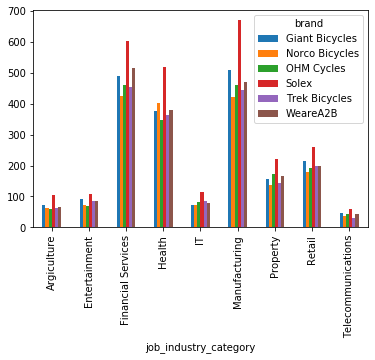

In [17]:
ct2.plot(kind="bar", stacked=False)

KeyError: 'Customer service calls'

In [20]:

ct3=pd.crosstab(oldcustomer["wealth_segment"], oldcustomer["brand"])
ct3

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
wealth_segment,,,,,,
Affluent Customer,520,428,466,651,484,491
High Net Worth,519,479,471,673,450,514
Mass Customer,993,901,946,1334,931,995


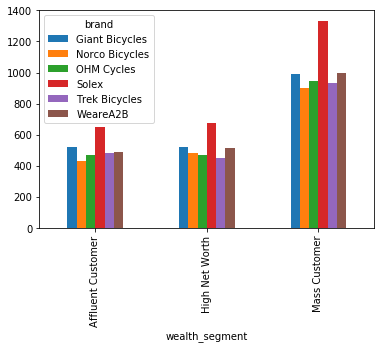

In [21]:
ct3.plot(kind="bar", stacked=False)


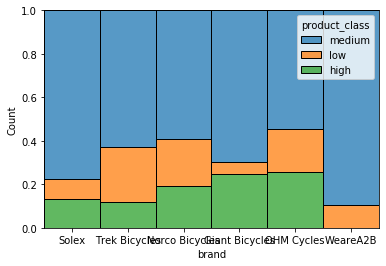

In [23]:


import seaborn as sns
sns.histplot(oldcustomer, x=oldcustomer["brand"], hue=oldcustomer["product_class"],multiple='fill', legend=True)

In [24]:

ct4=pd.crosstab(oldcustomer["owns_car"], oldcustomer["brand"])
oldcustomer.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'index', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date'],
      dtype='object')

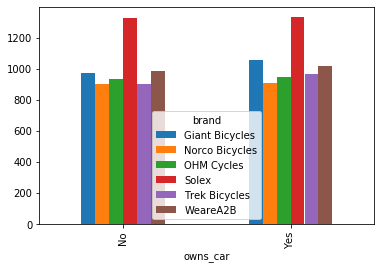

In [25]:

ct4.plot(kind="bar", stacked=False)


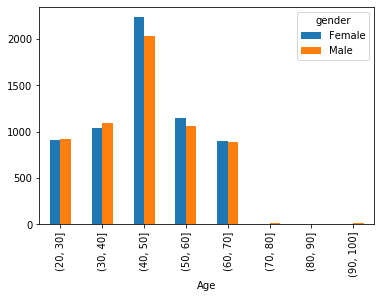

In [26]:
ct5=pd.crosstab(age_groups, oldcustomer["gender"])
ct5.plot(kind="bar", stacked=False)

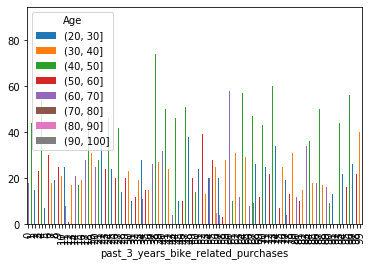

In [27]:
ct6=pd.crosstab(oldcustomer["past_3_years_bike_related_purchases"], age_groups)
ct6.plot(kind="bar", stacked=False)

SyntaxError: invalid syntax (<ipython-input-28-ac38dda5e1b8>, line 1)

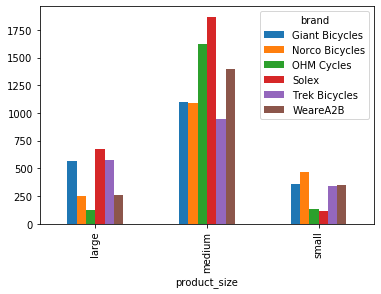

In [29]:
ct6=pd.crosstab(oldcustomer["product_size"], oldcustomer["brand"])
ct6.plot(kind="bar", stacked=False)

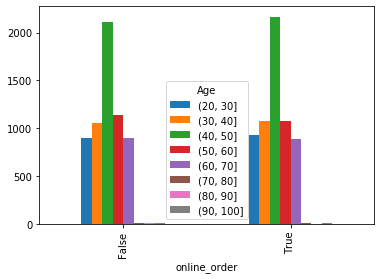

In [30]:
ct7=pd.crosstab(oldcustomer["online_order"], age_groups)
ct7.plot(kind="bar", stacked=False)

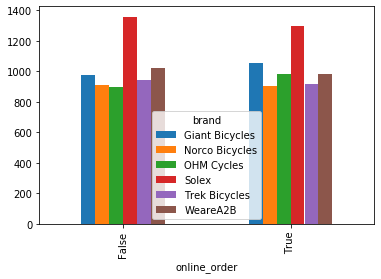

In [31]:
ct8=pd.crosstab(oldcustomer["online_order"], oldcustomer["brand"])
ct8.plot(kind="bar", stacked=False)

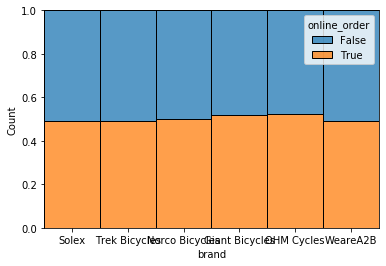

In [32]:
import seaborn as sns
sns.histplot(oldcustomer, x=oldcustomer["brand"], hue=oldcustomer["online_order"],multiple='fill', legend=True)

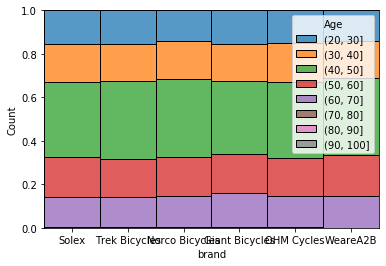

In [33]:
sns.histplot(oldcustomer, x=oldcustomer["brand"], hue=age_groups,multiple='fill', legend=True)

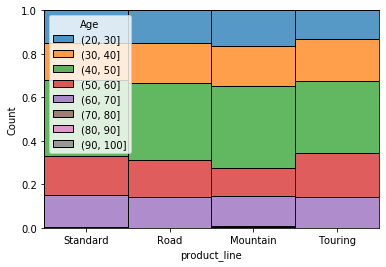

In [34]:

sns.histplot(oldcustomer["wealth_segment"], x=oldcustomer["product_line"], hue=age_groups,multiple='fill', legend=True)

In [23]:
ct9=pd.crosstab(oldcustomer['state'], oldcustomer['state'])
ct9

state,NSW,New South Wales,QLD,VIC,Victoria
state,,,,,
NSW,6177,0,0,0,0
New South Wales,0,317,0,0,0
QLD,0,0,2697,0,0
VIC,0,0,0,2770,0
Victoria,0,0,0,0,285


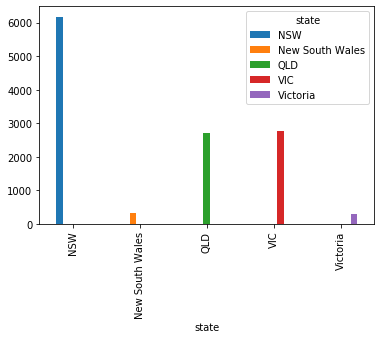

In [24]:
ct9.plot(kind="bar", stacked=False)

In [39]:
statedt= oldcustomer.value_counts("state")
statedt


state
NSW                6177
VIC                2770
QLD                2697
New South Wales     317
Victoria            285
dtype: int64

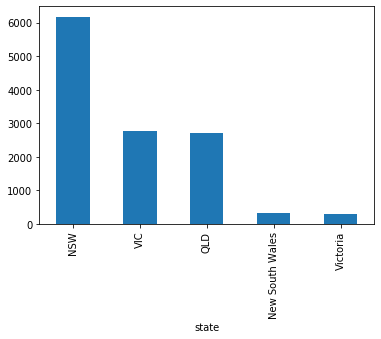

In [40]:
statedt.plot(kind='bar', stacked=False)

In [43]:
ct10=pd.crosstab(oldcustomer['state'], oldcustomer['past_3_years_bike_related_purchases'])
ct10

past_3_years_bike_related_purchases,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
state,,,,,,,,,,,,,,,,,,,,,
NSW,62,30,69,32,43,47,60,89,26,49,...,64,34,39,78,67,78,47,75,86,58
New South Wales,0,0,6,3,0,24,0,0,0,0,...,0,8,0,10,7,0,0,24,0,0
QLD,13,12,41,31,47,12,38,11,17,21,...,6,22,23,15,45,9,48,18,32,42
VIC,42,26,42,15,28,6,25,34,19,36,...,20,26,3,45,28,14,41,38,28,28
Victoria,10,6,12,4,0,0,5,0,4,0,...,7,6,0,7,0,0,0,0,4,4
